In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/fast/rsna-breast/tables/attn_scores_giddy_rain.csv')

In [3]:
df

,ptID,imgID,row,col,attention
0,106,76321767,0,0,0.004109
1,106,76321767,1,0,0.003043
2,106,76321767,1,1,0.003843
3,106,76321767,2,0,0.001581
4,106,76321767,2,1,0.000221
...,...,...,...,...,...
224228,65492,1731875242,13,14,0.000022
224229,65492,1731875242,14,14,0.000227
224230,65492,1731875242,15,14,0.000186
224231,65492,1731875242,16,14,0.000034


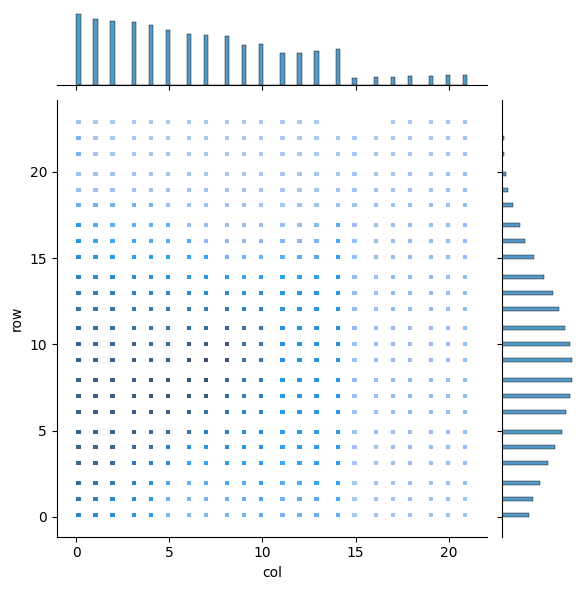

In [8]:
sns.jointplot(data=df, x='col', y='row', kind='hist')

In [5]:
df.attention.round(2).clip(upper=0.09).value_counts().head(10)

0.00    187267
0.01     18968
0.02      5458
0.09      5064
0.03      2825
0.04      1596
0.05      1105
0.06       845
0.07       622
0.08       483
Name: attention, dtype: int64

(0.0, 80.0)

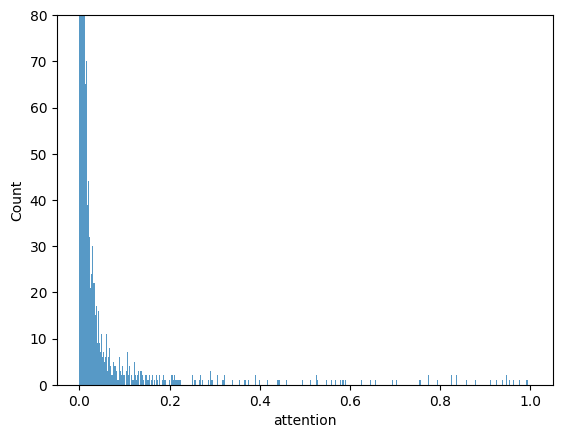

In [13]:
gfg = sns.histplot(data=df, x='attention')

#gfg = sns.boxplot(x="day", y="total_bill", data=tips)
gfg.set_ylim(0, 80)

In [19]:
sns.histplot?

    thresh   count
0     0.00  224233
1     0.01   23656
2     0.02   14705
3     0.03   10972
4     0.04    8812
5     0.05    7517
6     0.06    6565
7     0.07    5831
8     0.08    5287
9     0.09    4830
10    0.10    4434
11    0.11    4100
12    0.12    3835
13    0.13    3591
14    0.14    3371
15    0.15    3177
16    0.16    2999
17    0.17    2839
18    0.18    2696
19    0.19    2595


<AxesSubplot: xlabel='thresh', ylabel='count'>

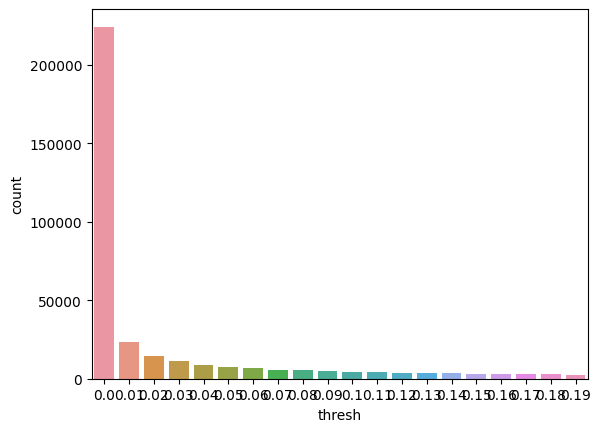

In [20]:

rows = []
for t in np.arange(0,0.2,0.01):
    count = len(df[df.attention>t])
    rows.append(dict(thresh=t, count=count))
D = pd.DataFrame(rows)
print(D)
sns.barplot(data=D, x='thresh', y='count')

In [ ]:
sns.distplot(df.attention)

In [12]:
df.attention.round(2).clip(upper=0.09).value_counts().head(10)


0.00    187267
0.01     18968
0.02      5458
0.09      5064
0.03      2825
0.04      1596
0.05      1105
0.06       845
0.07       622
0.08       483
Name: attention, dtype: int64

## What about from negative images too?

In [8]:
allDF = pd.read_csv('/fast/rsna-breast/tables/attn_scores_all_giddy_rain.csv')

In [9]:
allDF.attention.round(2).clip(upper=0.09).value_counts().head(10)


0.00    4271140
0.01     501267
0.02     146357
0.09     128422
0.03      73732
0.04      45347
0.05      31132
0.06      22620
0.07      17633
0.08      14211
Name: attention, dtype: int64

In [11]:
allDF.attention.round(1).clip(upper=1.0).value_counts().head(10)


0.0    5054690
0.1     119274
0.2      31577
0.3      15303
0.4       9308
0.5       6390
0.6       4684
0.7       3726
0.8       3005
0.9       2652
Name: attention, dtype: int64

In [14]:
allDF.shape, allDF[allDF.attention>0.1].shape

((5251861, 5), (111988, 5))

In [16]:
allDF.shape, allDF[allDF.attention>0.25].shape

((5251861, 5), (46320, 5))

## Do all source images have high-attention tiles?

In [17]:
len(set(allDF.ptID))

11913

In [20]:
len(set(allDF[allDF.attention>0.1].ptID))

11913

In [25]:
len(set(allDF[allDF.attention>0.12].ptID))        #  <--- could run daliFeaturizer on this reduced set of patches ...

11913

In [26]:
len(set(allDF[allDF.attention>0.13].ptID))

11912

In [21]:
len(set(allDF[allDF.attention>0.2].ptID))

11881

In [28]:
allDF.groupby('imgID')['attention'].std().sort_values()

imgID
1990776518    0.002731
1942326353    0.004145
1902008468    0.006226
481086069     0.006328
1818933332    0.006368
                ...   
1275907951    0.370148
463564233     0.375643
1452644344    0.432349
2016160657    0.449536
775490405     0.452334
Name: attention, Length: 54706, dtype: float64

In [31]:
allDF[allDF.imgID==1990776518].sort_values('attention')

,ptID,imgID,row,col,attention
2667953,33084,1990776518,14,1,9.552069e-07
2668062,33084,1990776518,19,0,1.905513e-06
2667823,33084,1990776518,8,3,2.100118e-06
2668106,33084,1990776518,21,0,2.272325e-06
2668084,33084,1990776518,20,0,2.782305e-06
...,...,...,...,...,...
2667719,33084,1990776518,3,9,1.355601e-02
2668110,33084,1990776518,21,4,1.359331e-02
2667795,33084,1990776518,6,19,1.404415e-02
2667835,33084,1990776518,8,15,1.841430e-02


In [32]:
allDF.shape

(5251861, 5)

In [34]:
allDF[allDF.imgID==775490405].sort_values('attention')

,ptID,imgID,row,col,attention
4191122,52509,775490405,8,10,0.180152
4191123,52509,775490405,9,10,0.819849


In [35]:
allDF[allDF.imgID==1990776518].sort_values('attention')

,ptID,imgID,row,col,attention
2667953,33084,1990776518,14,1,9.552069e-07
2668062,33084,1990776518,19,0,1.905513e-06
2667823,33084,1990776518,8,3,2.100118e-06
2668106,33084,1990776518,21,0,2.272325e-06
2668084,33084,1990776518,20,0,2.782305e-06
...,...,...,...,...,...
2667719,33084,1990776518,3,9,1.355601e-02
2668110,33084,1990776518,21,4,1.359331e-02
2667795,33084,1990776518,6,19,1.404415e-02
2667835,33084,1990776518,8,15,1.841430e-02


In [33]:
allDF[allDF.imgID==1990776518]['attention'].sum()

0.999999959702884

In [ ]:
# Grab top N tiles for each image, and assemble a shorter dataset

In [38]:
allDF.shape

(5251861, 5)

In [39]:
allDF.sort_values('attention', ascending=False).groupby('imgID').head(100)

,ptID,imgID,row,col,attention
2438695,30044,1995555438,8,1,9.999269e-01
2430282,29914,1065309974,12,5,9.999171e-01
3643928,45428,313351073,13,14,9.999118e-01
4219394,52961,1814196379,7,3,9.998230e-01
1418600,17591,1578809395,8,7,9.997883e-01
...,...,...,...,...,...
1418586,17591,1578809395,6,9,7.804885e-09
3504519,43811,463525632,0,7,7.012849e-09
4688985,58637,894696175,11,0,5.855286e-09
5186787,64729,1458462004,7,0,4.657553e-09


In [40]:
allDF.sort_values('attention', ascending=False).groupby('imgID').head(50)

,ptID,imgID,row,col,attention
2438695,30044,1995555438,8,1,9.999269e-01
2430282,29914,1065309974,12,5,9.999171e-01
3643928,45428,313351073,13,14,9.999118e-01
4219394,52961,1814196379,7,3,9.998230e-01
1418600,17591,1578809395,8,7,9.997883e-01
...,...,...,...,...,...
504256,6173,1958081100,0,1,2.677472e-08
2438685,30044,1995555438,5,1,2.227610e-08
4688960,58637,894696175,6,0,1.444550e-08
3504556,43811,463525632,8,6,1.011892e-08


In [41]:
allDF.sort_values('attention', ascending=False).groupby('imgID').head(20)

,ptID,imgID,row,col,attention
2438695,30044,1995555438,8,1,9.999269e-01
2430282,29914,1065309974,12,5,9.999171e-01
3643928,45428,313351073,13,14,9.999118e-01
4219394,52961,1814196379,7,3,9.998230e-01
1418600,17591,1578809395,8,7,9.997883e-01
...,...,...,...,...,...
2438686,30044,1995555438,5,2,1.951992e-07
4355143,54696,1913523606,5,7,1.711864e-07
2438689,30044,1995555438,6,2,1.484432e-07
2438680,30044,1995555438,3,1,1.043869e-07


In [42]:
allDF.sort_values('attention', ascending=False).groupby('imgID').head(15)

,ptID,imgID,row,col,attention
2438695,30044,1995555438,8,1,9.999269e-01
2430282,29914,1065309974,12,5,9.999171e-01
3643928,45428,313351073,13,14,9.999118e-01
4219394,52961,1814196379,7,3,9.998230e-01
1418600,17591,1578809395,8,7,9.997883e-01
...,...,...,...,...,...
4355135,54696,1913523606,2,8,7.387459e-07
2438681,30044,1995555438,4,0,6.844219e-07
2438692,30044,1995555438,7,1,6.022551e-07
2438691,30044,1995555438,7,0,3.266202e-07


In [45]:
allDF.sort_values('attention', ascending=False).groupby('imgID').head(10)

,ptID,imgID,row,col,attention
2438695,30044,1995555438,8,1,0.999927
2430282,29914,1065309974,12,5,0.999917
3643928,45428,313351073,13,14,0.999912
4219394,52961,1814196379,7,3,0.999823
1418600,17591,1578809395,8,7,0.999788
...,...,...,...,...,...
2438683,30044,1995555438,4,2,0.000002
2438696,30044,1995555438,8,2,0.000002
3643889,45428,313351073,8,15,0.000002
2438694,30044,1995555438,8,0,0.000002


In [49]:
allDFtop10 = allDF.sort_values('attention', ascending=False).groupby('imgID').head(10)
allDFtop10 = allDFtop10.sort_values(['ptID', 'imgID', 'row', 'col'])
allDFtop10.reset_index().to_feather('/fast/rsna-breast/tables/tile_224_stats_sorted_top10.feather')
#groups = 

In [50]:
allDFtop10

,ptID,imgID,row,col,attention
0,5,640805896,0,0,0.056900
1,5,640805896,0,1,0.017707
4,5,640805896,1,1,0.031871
12,5,640805896,4,0,0.061834
17,5,640805896,5,1,0.236555
...,...,...,...,...,...
5251795,65534,1888933323,5,7,0.014321
5251836,65534,1888933323,10,6,0.005366
5251838,65534,1888933323,10,8,0.048852
5251842,65534,1888933323,11,3,0.012680


In [51]:
dimTiles = pd.read_feather('/fast/rsna-breast/tables/tile_224_stats_sorted.feather')
dimTiles = dimTiles[dimTiles['max'] < 50]


In [54]:
dimTiles[dimTiles['max']<20].sort_values('max')

,ptID,imgID,row,col,min,max,std,mean
3310,71,198449006,1,0,0,1,0.496623,0.558016
2839245,33706,988688370,6,5,0,1,0.165091,0.971959
2839244,33706,988688370,6,4,0,1,0.300859,0.899354
2839243,33706,988688370,6,3,0,1,0.141595,0.979532
2839242,33706,988688370,6,2,0,1,0.007732,0.999940
...,...,...,...,...,...,...,...,...
4562972,54745,136576777,8,1,17,19,0.039929,17.999721
1350065,15979,471643474,0,2,16,19,0.576140,17.529855
4562971,54745,136576777,8,0,17,19,0.155682,17.975187
2908011,34655,1715567850,7,4,17,19,0.193495,17.962811
